# Kaggle Setup Code

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import some necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import the dataset

In [7]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_testing = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
df.shape

(1460, 81)

In [11]:
df_testing.shape

(1459, 80)

# Handling Outliers

## Checking the correlation between every feature and the feature that I'll try to predict

<AxesSubplot:>

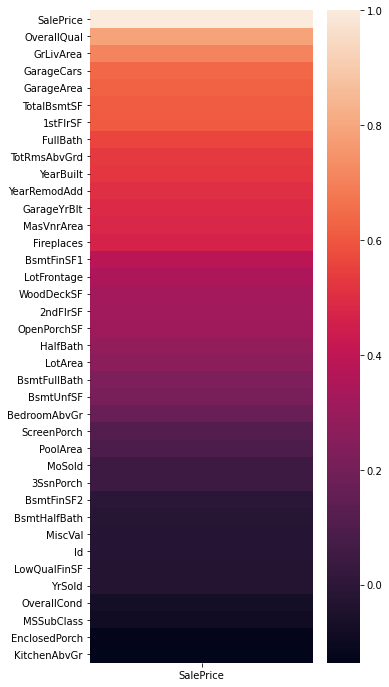

In [12]:
plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False))

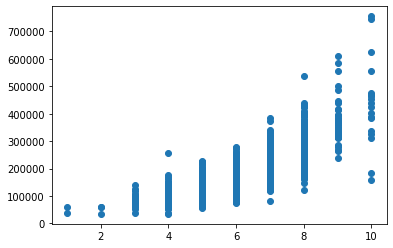

In [13]:
plt.scatter(df['OverallQual'], df['SalePrice'])

## Outliers:

In [14]:
df[(df['SalePrice'] < 200000) & (df['OverallQual'] == 10)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


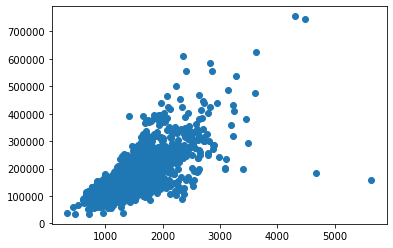

In [15]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

## Outliers:

In [16]:
df[(df['SalePrice'] < 200000) & (df['GrLivArea'] > 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


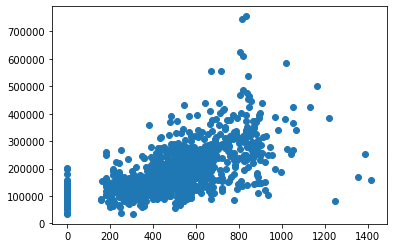

In [17]:
plt.scatter(df['GarageArea'], df['SalePrice'])

In [18]:
df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 200000)][['Id', 'GarageArea']]

,Id,GarageArea
1061,1062,1248
1190,1191,1356
1298,1299,1418


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
drop_idx = df[(df['SalePrice'] < 200000) & (df['GrLivArea'] > 4000)].index

In [21]:
drop_idx

Int64Index([523, 1298], dtype='int64')

In [22]:
df = df.drop(drop_idx, axis = 0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

# Deal with missing value

In [24]:
def missing_percentage(df):
    missing = df.isnull().sum()*100/len(df)
    print (missing[missing>0].sort_values())

In [25]:
missing_percentage(df)

Electrical       0.068587
MasVnrType       0.548697
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
BsmtExposure     2.606310
BsmtFinType2     2.606310
GarageCond       5.555556
GarageQual       5.555556
GarageFinish     5.555556
GarageType       5.555556
GarageYrBlt      5.555556
LotFrontage     17.764060
FireplaceQu     47.325103
Fence           80.727023
Alley           93.758573
MiscFeature     96.296296
PoolQC          99.588477
dtype: float64


In [26]:
missing_percentage(df_testing)

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


In [27]:
bsmt_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [28]:
df[bsmt_categorical] = df[bsmt_categorical].fillna('None')
df_testing[bsmt_categorical] = df_testing[bsmt_categorical].fillna('None')

In [29]:
missing_percentage(df)

Electrical       0.068587
MasVnrType       0.548697
MasVnrArea       0.548697
GarageType       5.555556
GarageYrBlt      5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
LotFrontage     17.764060
FireplaceQu     47.325103
Fence           80.727023
Alley           93.758573
MiscFeature     96.296296
PoolQC          99.588477
dtype: float64


In [30]:
missing_percentage(df_testing)

SaleType         0.068540
GarageArea       0.068540
GarageCars       0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
KitchenQual      0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
Functional       0.137080
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


In [31]:
garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual']
df[garage_categorical] = df[garage_categorical].fillna('None')
df_testing[garage_categorical] = df_testing[garage_categorical].fillna('None')

In [32]:
missing_percentage(df)

Electrical      0.068587
MasVnrType      0.548697
MasVnrArea      0.548697
GarageYrBlt     5.555556
GarageCond      5.555556
LotFrontage    17.764060
FireplaceQu    47.325103
Fence          80.727023
Alley          93.758573
MiscFeature    96.296296
PoolQC         99.588477
dtype: float64


In [33]:
missing_percentage(df_testing)

SaleType         0.068540
GarageArea       0.068540
GarageCars       0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
KitchenQual      0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
Functional       0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
Utilities        0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
GarageYrBlt      5.346127
GarageCond       5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


In [34]:
df['GarageCond'] = df['GarageCond'].fillna('None')

In [35]:
df_testing['GarageCond'] = df_testing['GarageCond'].fillna('None')

In [36]:
missing_percentage(df)

Electrical      0.068587
MasVnrType      0.548697
MasVnrArea      0.548697
GarageYrBlt     5.555556
LotFrontage    17.764060
FireplaceQu    47.325103
Fence          80.727023
Alley          93.758573
MiscFeature    96.296296
PoolQC         99.588477
dtype: float64


In [37]:
missing_percentage(df_testing)

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


In [38]:
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)

In [39]:
df_testing.drop('PoolQC', axis=1, inplace=True)
df_testing.drop('MiscFeature', axis=1, inplace=True)
df_testing.drop('Alley', axis=1, inplace=True)

In [40]:
missing_percentage(df)

Electrical      0.068587
MasVnrType      0.548697
MasVnrArea      0.548697
GarageYrBlt     5.555556
LotFrontage    17.764060
FireplaceQu    47.325103
Fence          80.727023
dtype: float64


In [41]:
missing_percentage(df_testing)

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
dtype: float64


In [42]:
df_testing.drop('Fence', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)

In [43]:
missing_percentage(df)

Electrical      0.068587
MasVnrType      0.548697
MasVnrArea      0.548697
GarageYrBlt     5.555556
LotFrontage    17.764060
FireplaceQu    47.325103
dtype: float64


In [44]:
missing_percentage(df_testing)

BsmtUnfSF        0.068540
GarageCars       0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
GarageArea       0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
dtype: float64


In [45]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [46]:
df = df.dropna(axis=0, subset=['Electrical'])

In [47]:
missing_percentage(df)

MasVnrType      0.549073
MasVnrArea      0.549073
GarageYrBlt     5.559369
LotFrontage    17.776253
FireplaceQu    47.288950
dtype: float64


In [48]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [49]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [50]:
missing_percentage(df)

GarageYrBlt     5.559369
LotFrontage    17.776253
FireplaceQu    47.288950
dtype: float64


In [51]:
df_testing['MasVnrType'] = df['MasVnrType'].fillna('None')
df_testing['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [52]:
missing_percentage(df)

GarageYrBlt     5.559369
LotFrontage    17.776253
FireplaceQu    47.288950
dtype: float64


In [53]:
missing_percentage(df_testing)

BsmtUnfSF        0.068540
GarageCars       0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
GarageArea       0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
MasVnrType       0.205620
MasVnrArea       0.205620
MSZoning         0.274160
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
dtype: float64


In [54]:
df['FireplaceQu'].value_counts()

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [55]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df_testing['FireplaceQu'] = df_testing['FireplaceQu'].fillna('None')

In [56]:
missing_percentage(df)

GarageYrBlt     5.559369
LotFrontage    17.776253
dtype: float64


In [57]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df_testing['GarageYrBlt'] = df_testing['GarageYrBlt'].fillna(0)

In [58]:
missing_percentage(df)

LotFrontage    17.776253
dtype: float64


In [59]:
missing_percentage(df_testing)

BsmtFinSF2       0.068540
GarageCars       0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
BsmtUnfSF        0.068540
GarageArea       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
MasVnrType       0.205620
MasVnrArea       0.205620
MSZoning         0.274160
LotFrontage     15.558602
dtype: float64


In [60]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))
df_testing['LotFrontage'] = df_testing.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [61]:
missing_percentage(df)

Series([], dtype: float64)


In [62]:
missing_percentage(df_testing)

BsmtUnfSF       0.06854
GarageCars      0.06854
KitchenQual     0.06854
TotalBsmtSF     0.06854
GarageArea      0.06854
BsmtFinSF2      0.06854
SaleType        0.06854
Exterior2nd     0.06854
Exterior1st     0.06854
BsmtFinSF1      0.06854
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
Utilities       0.13708
MasVnrArea      0.20562
MasVnrType      0.20562
MSZoning        0.27416
dtype: float64


In [63]:
df_testing['BsmtUnfSF'] = df_testing['BsmtUnfSF'].fillna(0)

In [64]:
df_testing['GarageCars'] = df_testing['GarageCars'].fillna(0)

In [65]:
df_testing['KitchenQual'] = df_testing['KitchenQual'].fillna('None')

In [66]:
df_testing['GarageArea'] = df_testing['GarageArea'].fillna(0)

In [67]:
df_testing['SaleType'] = df_testing['SaleType'].fillna('None')

In [68]:
missing_percentage(df_testing)

Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
TotalBsmtSF     0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MasVnrType      0.20562
MasVnrArea      0.20562
MSZoning        0.27416
dtype: float64


In [69]:
df_testing['MasVnrArea'] = df_testing['MasVnrArea'].fillna(0)

In [70]:
df_testing['MasVnrType'] = df_testing['MasVnrType'].fillna('None')

In [71]:
df_testing['TotalBsmtSF'] = df_testing['TotalBsmtSF'].fillna(0)

In [72]:
missing_percentage(df_testing)

Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64


In [73]:
df_testing['Exterior1st'] = df_testing['Exterior1st'].fillna('None')

In [74]:
df_testing['Exterior2nd'] = df_testing['Exterior2nd'].fillna('None')
df_testing['BsmtFinSF1'] = df_testing['BsmtFinSF1'].fillna(0)
df_testing['BsmtFinSF2'] = df_testing['BsmtFinSF1'].fillna(0)

In [75]:
missing_percentage(df_testing)

Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64


In [76]:
df['BsmtFullBath'].head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

In [77]:
df_testing['BsmtFullBath'] = df_testing['BsmtFullBath'].fillna(0)
df_testing['BsmtHalfBath'] = df_testing['BsmtHalfBath'].fillna(0)

In [78]:
df_testing['Utilities'] = df_testing['Utilities'].fillna(df_testing['Utilities'].mode()[0])

In [79]:
df_testing['Functional'] = df_testing['Functional'].fillna(df_testing['Functional'].mode()[0])

In [80]:
df_testing['MSZoning'] = df_testing['MSZoning'].fillna(df_testing['MSZoning'].mode()[0])

In [81]:
missing_percentage(df_testing)

Series([], dtype: float64)


In [82]:
df['GarageCond'].value_counts()

TA      1323
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [83]:
df_testing['GarageCond'].value_counts()

TA      1328
None      78
Fa        39
Po         7
Gd         6
Ex         1
Name: GarageCond, dtype: int64

In [84]:
df['BsmtCond'].value_counts()

TA      1308
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [85]:
df_testing['BsmtCond'].value_counts()

TA      1295
Fa        59
Gd        57
None      45
Po         3
Name: BsmtCond, dtype: int64

In [86]:
missing_percentage(df_testing)

Series([], dtype: float64)


In [87]:
missing_percentage(df)

Series([], dtype: float64)


# Concating Test and Train Data
The test and training data needs to be concatinated to do one hot encoding on every possible categorical values

In [88]:
df.shape

(1457, 77)

In [89]:
df_testing.shape

(1459, 76)

In [90]:
df['train'] = 1
df_testing['train'] = 0

In [91]:
df.shape


(1457, 78)

In [92]:
df_testing.shape

(1459, 77)

In [93]:
combined_data_set = pd.concat([df, df_testing])

In [94]:
combined_data_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,700,7,2006,WD,Normal,NaN,0


In [95]:
combined_data_set['MSSubClass'] = combined_data_set['MSSubClass'].apply(str)

In [96]:
combined_data_set['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 2916, dtype: object

In [97]:
combined_data_set_categorical = combined_data_set.select_dtypes(include='object')
combined_data_set_numerical = combined_data_set.select_dtypes(exclude='object')

In [98]:
combined_data_set_categorical_dummies = pd.get_dummies(combined_data_set_categorical, drop_first = True)

In [99]:
combined_data_set_categorical_dummies.shape

(2916, 228)

In [100]:
final_combined_df = pd.concat([combined_data_set_categorical_dummies, combined_data_set_numerical], axis=1)

In [101]:
final_combined_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
0,0,0,0,0,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,208500.0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,2007,181500.0,1
2,0,0,0,0,0,0,0,0,0,1,...,42,0,0,0,0,0,9,2008,223500.0,1
3,0,0,0,0,0,0,0,0,0,0,...,35,272,0,0,0,0,2,2006,140000.0,1
4,0,0,0,0,0,0,0,0,0,1,...,84,0,0,0,0,0,12,2008,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,2006,NaN,0
1455,0,1,0,0,0,0,0,0,0,0,...,24,0,0,0,0,0,4,2006,NaN,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,9,2006,NaN,0
1457,0,0,0,0,0,0,0,0,0,0,...,32,0,0,0,0,700,7,2006,NaN,0


In [102]:
train_df = final_combined_df[final_combined_df['train'] == 1]
test_df = final_combined_df[final_combined_df['train'] == 0]
train_df.drop(['train'], axis=1, inplace=True)
test_df.drop(['train', 'SalePrice'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
train_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,1,...,0,61,0,0,0,0,0,2,2008,208500.0
1,0,0,0,0,1,0,0,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,0,0,0,0,0,0,0,0,0,1,...,0,42,0,0,0,0,0,9,2008,223500.0
3,0,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,0,0,0,0,0,0,0,0,0,1,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,40,0,0,0,0,0,8,2007,175000.0
1456,0,0,0,0,1,0,0,0,0,0,...,349,0,0,0,0,0,0,2,2010,210000.0
1457,0,0,0,0,0,0,0,0,0,0,...,0,60,0,0,0,0,2500,5,2010,266500.0
1458,0,0,0,0,1,0,0,0,0,0,...,366,0,112,0,0,0,0,4,2010,142125.0


In [104]:
test_df

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,0,1,0,0,0,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,0,0,1,0,0,0,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,0,0,0,0,0,0,0,1,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,0,0,0,0,0,0,0,1,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,0,0,0,0,0,0,0,0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,0,1,0,0,0,0,0,0,0,0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,0,0,0,0,1,0,0,0,0,0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,0,0,0,0,0,0,0,0,0,0,...,0.0,80,32,0,0,0,0,700,7,2006


# Splitting data, scaling, regularization, and testing

## Implementing elastic net regression

In [105]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [106]:
scaler_fix = StandardScaler()
scaler_fix.fit(X)
X = scaler_fix.transform(X)
X_testing = scaler_fix.transform(test_df)

In [107]:
elastic_net_model = ElasticNet()
param_grid = {'alpha':[0.1, 1, 5, 10, 50, 100], 'l1_ratio':[.1,.5,.7,.95,.99,.1]}
grid_model = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

In [108]:
grid_model.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203044092000.08356, tolerance: 759151922.1329739
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203513269501.11624, tolerance: 728489898.4157841
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193211343637.20868, tolerance: 699194766.9208708
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205454690

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

In [109]:
grid_model.best_estimator_

ElasticNet(alpha=10, l1_ratio=0.99)

In [110]:
y_pred = grid_model.predict(X_testing)

In [111]:
y_pred

array([110214.51508491, 169356.49181846, 193727.01942337, ...,
       199579.73999978, 109587.54717991, 228832.07017315])

In [112]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Implementing Gradient Boosting (Regression)

Currently the best performing algorithm based on the submission ranking

In [113]:
grid_param = {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [64,100,128], 'max_depth': [2, 3, 4, 5]}
grid_search_obj = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_param)
grid_search_obj.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128]})

In [114]:
grid_search_obj.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 128}

In [115]:
gb_obj = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=128)
gb_obj.fit(X, y)

GradientBoostingRegressor(n_estimators=128)

In [116]:
y_pred = gb_obj.predict(X_testing)

In [117]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Implementing random forest regression

In [118]:
param_grid = {'n_estimators': [64, 96, 100, 128],
             'max_depth': [2,3,4,5],
             'min_samples_split': [2, 4, 16, 32],
             'min_samples_leaf': [2, 4, 16, 32],
             'min_impurity_decrease': [0.0, 0.1, 0.2]}
grid_obj = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)

In [119]:
grid_obj.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [2, 4, 16, 32],
                         'min_samples_split': [2, 4, 16, 32],
                         'n_estimators': [64, 96, 100, 128]})

In [120]:
grid_obj.best_estimator_

RandomForestRegressor(max_depth=5, min_impurity_decrease=0.1,
                      min_samples_leaf=2, n_estimators=96)

In [121]:
randomforest_obj = RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=96)

In [122]:
randomforest_obj.fit(X, y)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=96)

In [123]:
y_pred = randomforest_obj.predict(X_testing)

In [124]:
y_pred

array([125549.16611996, 148249.46873492, 176116.54026593, ...,
       147128.54552714, 121273.79499274, 225754.92853326])

In [125]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)